In [27]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz  
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import xgboost as xgb
import graphviz

In [29]:
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Full Destription of Each Field:
*Year*: The model year of the vehicle. This often indicates the manufacturing year.

*Make*: The brand or manufacturer of the vehicle. For example, "Kia" or "BMW."

*Model*: The specific name or designation given to a vehicle by the manufacturer, which differentiates it from other vehicles made by the same company.

*Trim*: This typically refers to different versions of the same model that come with different features or equipment levels.

*Body*: The body style or type of the vehicle, such as SUV (Sport Utility Vehicle) or Sedan. It describes the shape and model of the car's chassis and layout. 

*Transmission*: The mechanism that transmits the power from an automobile engine to the wheels, in this case, "automatic," meaning the car automatically shifts gears without driver input.

*VIN (Vehicle Identification Number)*: A unique code including a serial number used by the automotive industry to identify individual motor vehicles.

*State*: The U.S. state where the vehicle is registered. In this dataset, "ca" stands for California.

*Condition*: A score or rating given to the vehicle.

*Odometer*: The total distance that the vehicle has traveled, as recorded by the odometer.

*Color*: The exterior color of the vehicle.

*Interior*: The color of the vehicle's interior, which can include the seats, dashboard, carpeting, and other areas inside the cabin.

*Seller*: The entity or individual selling the vehicle. This can be a dealership, an auction house, a leasing company, or a private seller.

*MMR (Manheim Market Report)*: An industry-standard tool that provides wholesale prices for vehicles, it is used as a price reference for dealers to understand the value of used cars.

*Selling Price*: The price at which the vehicle was sold. This could differ from the MMR based on the vehicle's condition, market demand, and negotiation by the buyer and seller.

*Sale Date*: The date and time when the sale was completed, formatted to include the timezone—PST (Pacific Standard Time) in this case.

In [4]:
# Basic statistics about the dataset: 
df.head

<bound method NDFrame.head of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.

In [30]:
# Assuming 'df' is the DataFrame
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [31]:
# Count the number of unique values for each variable
df.nunique()

year                34
make                66
model              851
trim              1888
body                46
transmission         3
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [32]:
# Print the variables
print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [33]:
# Assuming df is the DataFrame
special_chars_pattern = r'[^a-zA-Z0-9\s]'
columns_to_clean = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'saledate']

# Applying str.contains() individually to each column and storing the results in a DataFrame
contains_special_chars = df[columns_to_clean].apply(lambda col: col.str.contains(special_chars_pattern, regex=True))

# Summing up the boolean DataFrame to see how many entries in each column contain special characters
count_special_chars = contains_special_chars.sum()
print(f'Number of entries with special characters in each column:\n{count_special_chars}')

# Optional: Sum across all columns to get the total number of rows with any special characters
total_special_chars = contains_special_chars.any(axis=1).sum()
print(f'Total entries with any special characters: {total_special_chars}')

Number of entries with special characters in each column:
make             17160
model            47014
trim             73533
body              1874
transmission         0
vin                  0
state                0
color            26134
interior         17557
saledate        558799
dtype: object
Total entries with any special characters: 558826


In [34]:
def clean_special_chars(column):
    return column.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# List of columns to clean
columns_to_clean = ['make', 'model', 'trim', 'body','color', 'interior', 'saledate']

# Apply the cleaning function to each column in the list
for column in columns_to_clean:
    df[column] = clean_special_chars(df[column])

In [35]:
# Assuming df is your DataFrame
special_chars_pattern = r'[^a-zA-Z0-9\s]'
columns_to_clean = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'saledate']

# Applying str.contains() individually to each column and storing the results in a DataFrame
contains_special_chars = df[columns_to_clean].apply(lambda col: col.str.contains(special_chars_pattern, regex=True))

# Summing up the boolean DataFrame to see how many entries in each column contain special characters
count_special_chars = contains_special_chars.sum()
print(f'Number of entries with special characters in each column:\n{count_special_chars}')

# Optional: Sum across all columns to get the total number of rows with any special characters
total_special_chars = contains_special_chars.any(axis=1).sum()
print(f'Total entries with any special characters: {total_special_chars}')

Number of entries with special characters in each column:
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
color           0
interior        0
saledate        0
dtype: object
Total entries with any special characters: 0


In [36]:
df[['Day', 'Month', 'Date', 'Year', 'Time', 'Timezone_Offset', 'Timezone']] = df['saledate'].str.split(expand=True)

# Process 'Time' to a more readable format
df['Time'] = df['Time'].str.slice(0, 2) + ':' + df['Time'].str.slice(2, 4) + ':' + df['Time'].str.slice(4, 6)

# Process 'Timezone_Offset' to include GMT prefix
df['Timezone_Offset'] = 'GMT' + df['Timezone_Offset'].str.slice(3, 7)

# Display the updated DataFrame
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,Day,Month,Date,Year,Time,Timezone_Offset,Timezone
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG566472,CA,5.0,16639.0,...,20500.0,21500.0,TUE DEC 16 2014 123000 GMT0800 PST,TUE,DEC,16,2014,12:30:00,GMT0800,PST
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG561319,CA,5.0,9393.0,...,20800.0,21500.0,TUE DEC 16 2014 123000 GMT0800 PST,TUE,DEC,16,2014,12:30:00,GMT0800,PST
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,WBA3C1C51EK116351,CA,45.0,1331.0,...,31900.0,30000.0,THU JAN 15 2015 043000 GMT0800 PST,THU,JAN,15,2015,04:30:00,GMT0800,PST
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,YV1612TB4F1310987,CA,41.0,14282.0,...,27500.0,27750.0,THU JAN 29 2015 043000 GMT0800 PST,THU,JAN,29,2015,04:30:00,GMT0800,PST
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,WBA6B2C57ED129731,CA,43.0,2641.0,...,66000.0,67000.0,THU DEC 18 2014 123000 GMT0800 PST,THU,DEC,18,2014,12:30:00,GMT0800,PST


In [37]:
# Count the number of duplicates
duplicates = df.duplicated(subset=['vin','Day', 'Month', 'Date', 'Year', 'Time'])
print(len(duplicates))
print('The number of duplicates:', duplicates.sum())

558837
The number of duplicates: 91


In [38]:
# Drop duplicates
df = df.drop_duplicates(subset=['vin', 'Day', 'Month', 'Date', 'Year', 'Time'])

In [39]:
duplicates = df.duplicated(subset=['vin','Day', 'Month', 'Date', 'Year', 'Time'])
print(duplicates)
duplicates.sum()

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Length: 558746, dtype: bool


0

In [40]:
# Count the number of null
df.isnull().sum()

year                   0
make               10298
model              10396
trim               10648
body               13190
transmission       65335
vin                    4
state                  0
condition          11806
odometer              93
color                746
interior             746
seller                 0
mmr                   34
sellingprice          12
saledate              12
Day                   12
Month                 34
Date                  34
Year                  34
Time                  34
Timezone_Offset       34
Timezone              34
dtype: int64

In [41]:
# Drop rows with null values 
df = df.dropna()

In [42]:
df.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color              0
interior           0
seller             0
mmr                0
sellingprice       0
saledate           0
Day                0
Month              0
Date               0
Year               0
Time               0
Timezone_Offset    0
Timezone           0
dtype: int64

In [43]:
def correct_condition(x):
    if x > 5:
        return x / 10
    return x

# Apply the correction
df['condition'] = df['condition'].apply(correct_condition)

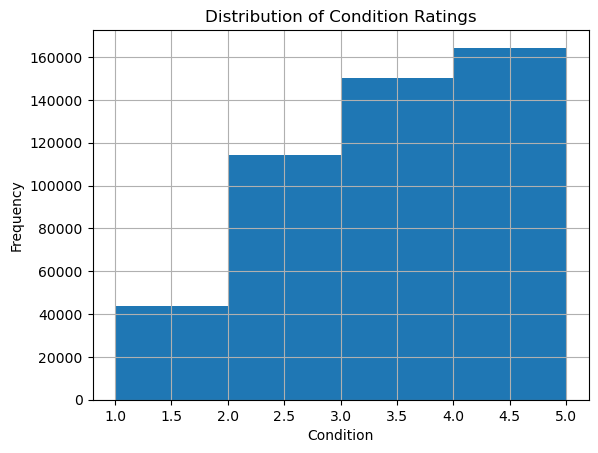

In [44]:
import matplotlib.pyplot as plt

# Plot a histogram to see the distribution of 'condition'
df['condition'].hist(bins=range(1, 6))
plt.title('Distribution of Condition Ratings')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

In [45]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,Day,Month,Date,Year,Time,Timezone_Offset,Timezone
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG566472,CA,5.0,16639.0,...,20500.0,21500.0,TUE DEC 16 2014 123000 GMT0800 PST,TUE,DEC,16,2014,12:30:00,GMT0800,PST
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG561319,CA,5.0,9393.0,...,20800.0,21500.0,TUE DEC 16 2014 123000 GMT0800 PST,TUE,DEC,16,2014,12:30:00,GMT0800,PST
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,WBA3C1C51EK116351,CA,4.5,1331.0,...,31900.0,30000.0,THU JAN 15 2015 043000 GMT0800 PST,THU,JAN,15,2015,04:30:00,GMT0800,PST
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,YV1612TB4F1310987,CA,4.1,14282.0,...,27500.0,27750.0,THU JAN 29 2015 043000 GMT0800 PST,THU,JAN,29,2015,04:30:00,GMT0800,PST
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,WBA6B2C57ED129731,CA,4.3,2641.0,...,66000.0,67000.0,THU DEC 18 2014 123000 GMT0800 PST,THU,DEC,18,2014,12:30:00,GMT0800,PST


In [46]:
# Assuming df is already loaded and available
# Indices of rows to drop
rows_to_drop = [417837, 421291, 424163, 427042, 427045, 434426, 444503, 453796, 
                461599, 461614, 492486, 497010, 497013, 499085, 501457, 505301, 
                505308, 520463, 528998, 529011, 529015, 529624, 548786, 551224, 554712]

# Dropping the rows safely
df = df.drop(rows_to_drop, axis=0, errors='ignore')

# Check the current DataFrame
print(df)

        year    make                model         trim       body  \
0       2015     KIA              SORENTO           LX        SUV   
1       2015     KIA              SORENTO           LX        SUV   
2       2014     BMW             3 SERIES   328I SULEV      SEDAN   
3       2015   VOLVO                  S60           T5      SEDAN   
4       2014     BMW  6 SERIES GRAN COUPE         650I      SEDAN   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 SERIES         528I      SEDAN   
558833  2012     RAM                 2500  POWER WAGON   CREW CAB   
558834  2012     BMW                   X5    XDRIVE35D        SUV   
558835  2015  NISSAN               ALTIMA         25 S      SEDAN   
558836  2014    FORD                 F150          XLT  SUPERCREW   

       transmission                vin state  condition  odometer  ...  \
0         AUTOMATIC  5XYKTCA69FG566472    CA        5.0   16639.0  ...   
1         AUTOMATIC  5X

In [47]:
matrix = df.corr(numeric_only=True)
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                  year  condition  odometer       mmr  sellingprice
year          1.000000   0.548287 -0.773097  0.588589      0.578906
condition     0.548287   1.000000 -0.537527  0.481428      0.535952
odometer     -0.773097  -0.537527  1.000000 -0.582632     -0.577374
mmr           0.588589   0.481428 -0.582632  1.000000      0.983493
sellingprice  0.578906   0.535952 -0.577374  0.983493      1.000000


In [48]:
# Encode categorical variables using Label Encoder
encoder = LabelEncoder()
df['make_encoded'] = encoder.fit_transform(df['make'].astype(str))
df['model_encoded'] = encoder.fit_transform(df['model'].astype(str))
df['trim_encoded'] = encoder.fit_transform(df['trim'].astype(str))
df['body_encoded'] = encoder.fit_transform(df['body'].astype(str))
df['transmission_encoded'] = encoder.fit_transform(df['transmission'].astype(str))
df['color_encoded'] = encoder.fit_transform(df['color'].astype(str))
df['interior_encoded'] = encoder.fit_transform(df['interior'].astype(str))
df['seller_encoded'] = encoder.fit_transform(df['body'].astype(str))

In [49]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,Timezone_Offset,Timezone,make_encoded,model_encoded,trim_encoded,body_encoded,transmission_encoded,color_encoded,interior_encoded,seller_encoded
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG566472,CA,5.0,16639.0,...,GMT0800,PST,24,634,861,39,0,18,2,39
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,5XYKTCA69FG561319,CA,5.0,9393.0,...,GMT0800,PST,24,634,861,39,0,18,1,39
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,WBA3C1C51EK116351,CA,4.5,1331.0,...,GMT0800,PST,4,8,225,36,0,8,2,36
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,YV1612TB4F1310987,CA,4.1,14282.0,...,GMT0800,PST,52,578,1221,36,0,18,2,36
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,WBA6B2C57ED129731,CA,4.3,2641.0,...,GMT0800,PST,4,33,331,36,0,8,2,36


In [94]:
# Assuming df is loaded and preprocessed correctly
X = df.drop(['sellingprice','year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'Date', 
             'Year', 'Time', 'Timezone_Offset', 'Timezone', 'saledate', 'Day', 'Month', 'color', 'interior', 
             'seller'], axis=1)  # Features
y = df['sellingprice']  # Target variable

In [95]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [96]:
# Initialize and fit Elastic Net Model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

# Initialize and fit XGBoost Model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=3, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Initialize and fit MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.001, max_iter=500)
mlp_reg.fit(X_train, y_train)
y_pred_mlp = mlp_reg.predict(X_test)

# Evaluate the models
print("Elastic Net R^2:", r2_score(y_test, y_pred_elastic))
print("Elastic Net RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("XGBoost R^2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MLP Regression R^2:", r2_score(y_test, y_pred_mlp))
print("MLP Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))

Elastic Net R^2: 0.969406512816175
Elastic Net RMSE: 1679.8078199105187
XGBoost R^2: 0.9449621558907747
XGBoost RMSE: 2253.075858861031
MLP Regression R^2: 0.9674659946739433
MLP Regression RMSE: 1732.2631787901544


In [97]:
# Initialize the RandomForest Regressor
rfr = RandomForestRegressor(n_estimators=45, random_state=45)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Predict on the test set
y_pred = rfr.predict(X_test)

# Calculate and print R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.97
Root Mean Squared Error: 1672.74


In [109]:
# Initialize the RandomForest Regressor
rfr = RandomForestRegressor(n_estimators=45, random_state=45)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Predict on the test set
y_pred = rfr.predict(X_test)

# Calculate and print R-squared and RMSE for RandomForestRegressor
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RandomForest Regressor R-squared: {r2:.2f}")
print(f"RandomForest Regressor Root Mean Squared Error: {rmse:.2f}")

# Define additional models for cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100),
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.001, max_iter=500),
    'RandomForest': rfr  # Including the already trained RandomForestRegressor for comparison
}

# Perform 5-fold cross-validation and print results for both R^2 and RMSE
for name, model in models.items():
    # Calculate R^2 scores
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} Cross-Validated R^2: {np.mean(r2_scores):.2f} +/- {np.std(r2_scores):.2f}")

    # Calculate RMSE scores
    rmse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-rmse_scores)  # Convert negative MSE to RMSE
    print(f"{name} Cross-Validated RMSE: {np.mean(rmse_scores):.2f} +/- {np.std(rmse_scores):.2f}")

RandomForest Regressor R-squared: 0.97
RandomForest Regressor Root Mean Squared Error: 1672.74
Linear Regression Cross-Validated R^2: 0.97 +/- 0.01
Linear Regression Cross-Validated RMSE: 1574.87 +/- 167.06
Elastic Net Cross-Validated R^2: 0.97 +/- 0.01
Elastic Net Cross-Validated RMSE: 1575.99 +/- 167.50
XGBoost Cross-Validated R^2: 0.95 +/- 0.00
XGBoost Cross-Validated RMSE: 2215.49 +/- 132.76
MLPRegressor Cross-Validated R^2: 0.97 +/- 0.01
MLPRegressor Cross-Validated RMSE: 1593.55 +/- 189.18
RandomForest Cross-Validated R^2: 0.97 +/- 0.01
RandomForest Cross-Validated RMSE: 1570.77 +/- 153.10


## Ridge Regression

In [98]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
scaler = StandardScaler().fit(X_train)
# set a large alpha to get smaller coefficients
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
condition                880.244024
odometer                 276.281267
mmr                     9194.230090
make_encoded              13.592887
model_encoded              4.054116
trim_encoded             -47.560009
body_encoded             -33.411638
transmission_encoded     -33.139529
color_encoded             15.607227
interior_encoded           9.632564
seller_encoded           -33.411638
dtype: float64


In [99]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 0.8111308307896868


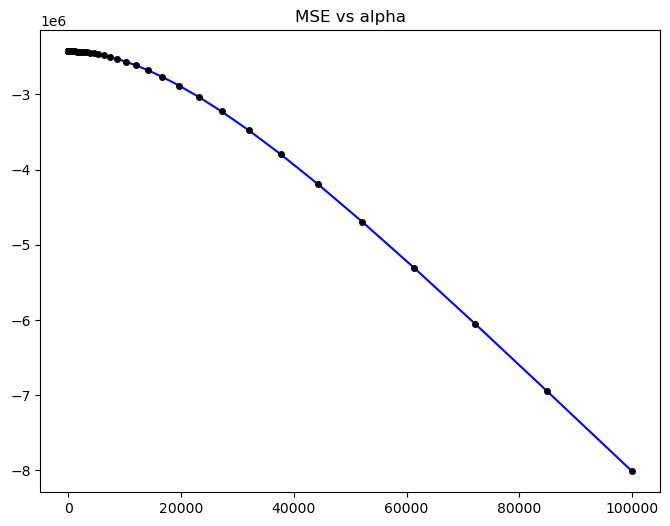

The best alpha by cross-validation is  2.5353644939701114


In [100]:
scores_list = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model,scale(X_train),y_train,cv=5,scoring='neg_mean_squared_error') 
    scores_list.append(scores.mean())

plt.plot(alphas, scores_list,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', 
         markerfacecolor = 'black',label = 'Score')
plt.title('MSE vs alpha')
plt.show()

index = np.argmax(np.array(scores_list))
alpha_best = alphas[index]
print('The best alpha by cross-validation is ', alpha_best)

In [101]:
ridge = Ridge(alpha=0.811)
ridge.fit(scale(X_train),y_train)
y_pred_test = ridge.predict(scale(X_test))
mean2 = mean_squared_error(y_test,y_pred_test) 
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_test)),'.3f'))
r2 = r2_score(y_test, y_pred_test)
print("\nRMSE:",rmse)
print("\nR^2:", r2)


RMSE: 1679.069

R^2: 0.9694334013805369


## LASSO

In [102]:
lasso = Lasso(alpha=1)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
condition                878.838174
odometer                 274.164355
mmr                     9192.601831
make_encoded              12.468037
model_encoded              3.119695
trim_encoded             -46.442717
body_encoded             -61.170938
transmission_encoded     -31.991464
color_encoded             14.646022
interior_encoded           8.644507
seller_encoded            -4.515537
dtype: float64


In [103]:
alphas = 10**np.linspace(-2,5,100)
lasso = Lasso()
lasso_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    lasso_coefs.append(lasso.coef_)

In [104]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas = alphas)
lassocv.fit(scale(X_train),  y_train)
print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.01


In [105]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
condition                880.220431
odometer                 276.272003
mmr                     9194.250363
make_encoded              13.583768
model_encoded              4.043454
trim_encoded             -47.548984
body_encoded             -62.111215
transmission_encoded     -33.126650
color_encoded             15.599208
interior_encoded           9.624396
seller_encoded            -4.696758
dtype: float64


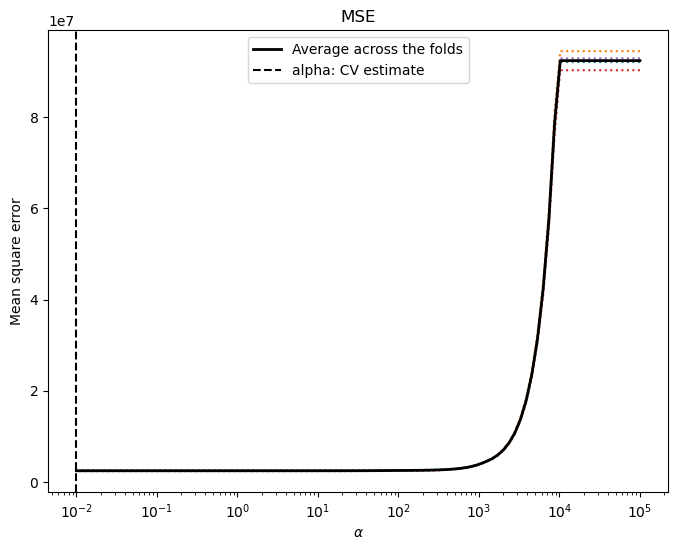

In [106]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [107]:
y_pred_test = lasso.predict(scale(X_test))
mse2 = mean_squared_error(y_test, y_pred_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_test)),'.3f'))
r2 = r2_score(y_test, y_pred_test)
print("\nRMSE:",rmse)
print("\nR^2:", r2)


RMSE: 1679.07

R^2: 0.9694333906342198


In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor # for building the model

# Assuming df is loaded and preprocessed correctly
X = df.drop(['sellingprice', 'year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'Date', 'Year', 'Time', 'Timezone_Offset', 'Timezone', 'saledate', 'Day', 'Month', 'color', 'interior', 'seller'], axis=1)  # Features
y = df['sellingprice']  # Target variable

# Splitting the dataset for RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

dtr = DecisionTreeRegressor(random_state = 20,max_depth=5)

dtr.fit(X_train, y_train)

# Predict on the test set
y_pred = dtr.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:",rmse)

r2 = r2_score(y_test, y_pred)
print("\nR^2:", r2)

# Visualizing the decision tree structure
# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(dtr, out_file ='tree_structure.dot', 
               feature_names = ['condition','odometer',	'mmr','make_encoded','model_encoded','trim_encoded','body_encoded',
                                'transmission_encoded','color_encoded',	'interior_encoded',	'seller_encoded'])


RMSE: 1891.972

R^2: 0.9611903961314647


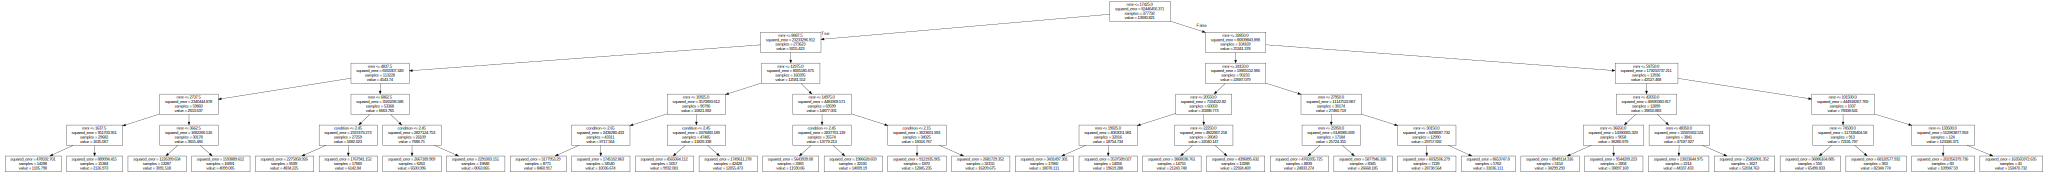

In [110]:
import graphviz
graphviz.Source.from_file('tree_structure.dot')

## Linear regression

In [92]:
print("car price coefficient")
for i in range(1,10):
    xtrain = X_train.iloc[:, :i]
    linear_regressor = LinearRegression()
    linear_regressor.fit(xtrain, y_train) 
    print(pd.Series(linear_regressor.coef_.flatten(), index=xtrain.columns))

car price coefficient
condition    5454.213865
dtype: float64
condition    3215.02713
odometer       -0.07574
dtype: float64
condition    926.725708
odometer       0.005382
mmr            0.964814
dtype: float64
condition       927.026400
odometer          0.005411
mmr               0.964982
make_encoded      1.012231
dtype: float64
condition        927.084276
odometer           0.005417
mmr                0.965002
make_encoded       1.022246
model_encoded     -0.012842
dtype: float64
condition        929.453706
odometer           0.005400
mmr                0.964964
make_encoded       0.695644
model_encoded      0.011106
trim_encoded      -0.123149
dtype: float64
condition        934.068220
odometer           0.005353
mmr                0.963880
make_encoded       0.830311
model_encoded      0.018395
trim_encoded      -0.124294
body_encoded      -6.412151
dtype: float64
condition               934.175946
odometer                  0.005357
mmr                       0.963682
make_encode

In [65]:
print("\ncar price MSE for training data")
trainlist=[]
for i in range(1,10):
    xtrain = X_train.iloc[:, :i]
    linear_regressor = LinearRegression()
    linear_regressor.fit(xtrain, y_train) 
    y_pred = linear_regressor.predict(xtrain)
    msetrain = np.sqrt(round(mean_squared_error(y_train, y_pred),3))
    print(f"RMSE in training data is {msetrain}")
    trainlist.append(msetrain)


car price MSE for training data
RMSE in training data is 8123.698640520831
RMSE in training data is 7418.147363863837
RMSE in training data is 1559.922447110753
RMSE in training data is 1559.854302811644
RMSE in training data is 1559.8519599628678
RMSE in training data is 1559.180064008003
RMSE in training data is 1557.9708408696229
RMSE in training data is 1557.6157555700315
RMSE in training data is 1557.5357347425452


In [66]:
print("car price MSE for testing data")
testlist = []
for i in range(1,10):    
    xtrain = X_train.iloc[:, :i]
    xtest = X_test.iloc[:, :i]
    linear_regressor = LinearRegression()
    linear_regressor.fit(xtrain, y_train) 
    Y_pred = linear_regressor.predict(xtest) # use X_test
    msetest = np.sqrt(round(mean_squared_error(y_test, Y_pred),3)) # use y_test   
    print(f"RMSE in test data is {msetest}")
    testlist.append(msetest)

car price MSE for testing data
RMSE in test data is 8082.638751917594
RMSE in test data is 7403.886819029583
RMSE in test data is 1681.2739488257112
RMSE in test data is 1681.2127387692492
RMSE in test data is 1681.2005044015423
RMSE in test data is 1680.6355407999677
RMSE in test data is 1679.264101623089
RMSE in test data is 1678.7528478010097
RMSE in test data is 1678.7057970353233


Text(0.5, 1.0, 'Testing Performance of selling price ')

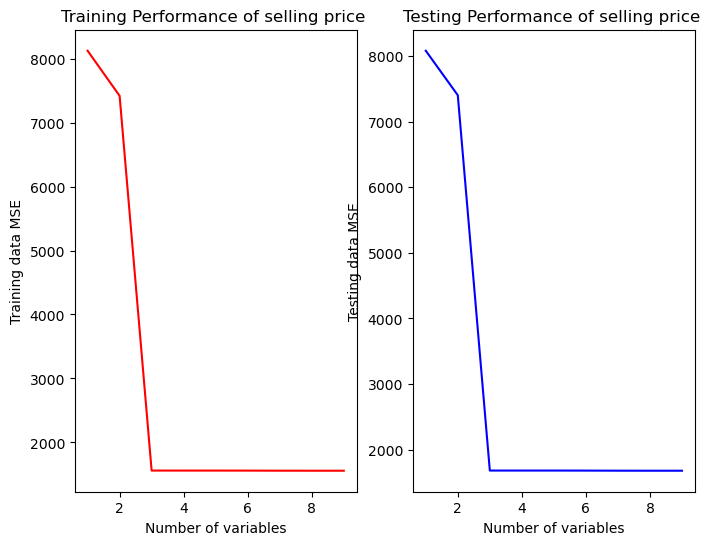

In [93]:
plt.rcParams["figure.figsize"] = (8,6) 
plt.subplot(1,2,1)
x1=list(range(1,10))
y1=trainlist
plt.plot(x1,y1,c='r')
plt.xlabel('Number of variables')
plt.ylabel('Training data MSE')
plt.title("Training Performance of selling price ")
plt.subplot(1,2,2)
x1=list(range(1,10))
y1=testlist
plt.plot(x1,y1,c='b')
plt.xlabel('Number of variables')
plt.ylabel('Testing data MSE')
plt.title("Testing Performance of selling price ")

In [108]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print("Intercept: \n", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)

y_pred = regr.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Intercept: 
 -2929.9651665405254
Coefficients: 
 [ 9.33476641e+02  5.32856089e-03  9.63840353e-01  9.39297042e-01
  1.91492000e-02 -1.26387539e-01 -3.45337000e+00 -1.81588573e+02
  2.34826688e+00  2.56462963e+00 -3.45337000e+00]
Root Mean squared error: 1678.65
Coefficient of determination: 0.97


## Elastic Net

In [69]:
alphasela = 10**np.linspace(-2,5,100)
ENcv = ElasticNetCV(alphas= alphasela, l1_ratio = 0.9,cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.01


In [70]:
lassocv = LassoCV(alphas=alphasela, cv=10)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.01


In [71]:
# with the best alpha
lasso = Lasso()
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
condition                890.560120
odometer                 237.176637
mmr                     9119.186673
make_encoded               8.460689
model_encoded              7.667344
trim_encoded             -47.460137
body_encoded             -37.554484
transmission_encoded     -35.619911
color_encoded             12.732837
interior_encoded           7.546821
seller_encoded           -36.914707
dtype: float64


# RMSE

In [72]:
y_pred_train = EN.predict(scale(X_train))
mse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error on Training Data:", mse)

Root Mean Squared Error on Training Data: 1558.6053618959024


In [73]:
y_pred_test = EN.predict(scale(X_test))
mse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error on Testing Data:", mse2)

Root Mean Squared Error on Testing Data: 1678.8051787713428


# Evaluation

In [75]:
X_test[:100]

,condition,odometer,mmr,make_encoded,model_encoded,trim_encoded,body_encoded,transmission_encoded,color_encoded,interior_encoded,seller_encoded
183853,3.4,42360.0,10550.0,50,164,788,36,0,18,1,36
456215,3.4,39647.0,9550.0,7,632,834,36,0,3,2,36
475450,2.0,70860.0,20400.0,17,495,593,39,0,5,2,39
355397,3.4,44069.0,9475.0,19,52,658,36,0,15,7,36
467973,4.0,10227.0,22600.0,8,677,1247,28,0,7,2,28
...,...,...,...,...,...,...,...,...,...,...,...
398364,2.6,122117.0,1375.0,39,315,692,6,0,15,7,6
451589,3.9,57341.0,10150.0,36,64,104,36,0,5,2,36
349289,3.4,18019.0,29100.0,7,110,1183,6,0,18,2,6
189265,3.5,55993.0,12250.0,19,631,382,36,0,16,7,36


In [111]:
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test[:100])

# Calculate and print R-squared and RMSE
r2 = r2_score(y_test[:100], y_pred)
rmse = mean_squared_error(y_test[:100], y_pred, squared=False)
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.99
Root Mean Squared Error: 1090.03


In [113]:
# generate list to compare the predicted price and actual selling price
y_testlist = []
for i in y_test[:100]:
    y_testlist.append(i)
    
eva = pd.DataFrame(
    {'predicted price': y_pred[:100],
     'selling price': y_testlist,
     'Difference': y_testlist-y_pred[:100]
    })
eva

,predicted price,selling price,Difference
0,10384.791712,11000.0,615.208288
1,9336.593826,9200.0,-136.593826
2,18674.919972,18600.0,-74.919972
3,9351.280282,10300.0,948.719718
4,22332.280103,23000.0,667.719897
...,...,...,...
95,1440.002833,1650.0,209.997167
96,10589.242221,10500.0,-89.242221
97,28252.747684,29700.0,1447.252316
98,12231.141300,12100.0,-131.141300


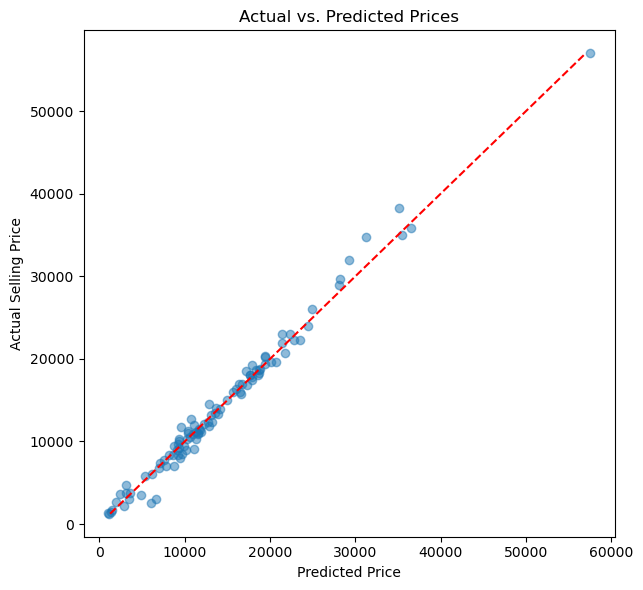

In [114]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs. predicted prices
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(eva['predicted price'], eva['selling price'], alpha=0.5)
plt.plot([eva['selling price'].min(), eva['selling price'].max()], [eva['selling price'].min(), eva['selling price'].max()], 'r--')  # Red dashed line for perfect prediction
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Selling Price')



plt.tight_layout()
plt.show()